In [77]:
#importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# #Fetching data

In [87]:
covid_df=pd.read_csv('country_vaccinations.csv')

# Data checking and cleaning

In [5]:
covid_df.head() #top 5 rows of the dataset

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22-02-2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,23-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,24-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,25-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,26-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21628 entries, 0 to 21627
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              21628 non-null  object 
 1   iso_code                             21628 non-null  object 
 2   date                                 21628 non-null  object 
 3   total_vaccinations                   12275 non-null  float64
 4   people_vaccinated                    11479 non-null  float64
 5   people_fully_vaccinated              8967 non-null   float64
 6   daily_vaccinations_raw               10187 non-null  float64
 7   daily_vaccinations                   21412 non-null  float64
 8   total_vaccinations_per_hundred       12275 non-null  float64
 9   people_vaccinated_per_hundred        11479 non-null  float64
 10  people_fully_vaccinated_per_hundred  8967 non-null   float64
 11  daily_vaccinations_per_milli

In [9]:
covid_df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      9353
people_vaccinated                      10149
people_fully_vaccinated                12661
daily_vaccinations_raw                 11441
daily_vaccinations                       216
total_vaccinations_per_hundred          9353
people_vaccinated_per_hundred          10149
people_fully_vaccinated_per_hundred    12661
daily_vaccinations_per_million           216
vaccines                                   0
source_name                                0
source_website                             0
month                                      0
day                                        0
dtype: int64

NOTE-from NULL analysis we can find that columns name total_vaccinations people_vaccinated people_fully_vaccinated daily_vaccinations_raw total_vaccinations_per_hundred people_vaccinated_per_hundred people_fully_vaccinated_per_hundred 50% NULL values and they are mostly dependent on each other

In [80]:
covid_df['daily_vaccinations'].fillna(value=0,inplace = True) #filling NaN with 0
#similarly column daily_vaccinations_per_million  is also first date data of countries so filling those Nan with 0
covid_df['daily_vaccinations_per_million'].fillna(value=0,inplace = True) #filling NaN with 0
covid_df.fillna(0,inplace=True)



# EDA(Exploratory Data analysis)

In [13]:
covid_df.head()  #analysing top 5 values of dataframe

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,2,26


In [14]:
covid_df.tail() #analysing last 5 values of dataframe

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month,day
21623,Zimbabwe,ZWE,2021-05-27,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1399441311...,5,27
21624,Zimbabwe,ZWE,2021-05-28,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1399441311...,5,28
21625,Zimbabwe,ZWE,2021-05-29,1002465.0,666786.0,335679.0,25669.0,14056.0,6.74,4.49,2.26,946.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1399441311...,5,29
21626,Zimbabwe,ZWE,2021-05-30,1011973.0,670755.0,341218.0,9508.0,14420.0,6.81,4.51,2.30,970.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1399441311...,5,30
21627,Zimbabwe,ZWE,2021-05-31,1020078.0,675678.0,344400.0,8105.0,15022.0,6.86,4.55,2.32,1011.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1399441311...,5,31


In [18]:
covid_df.shape #checking shape of the data frame which is having 21628 rows and 17 columns (initially is was 15 but day and month increased we have created)

(21628, 17)

In [19]:
 covid_df.columns  #checking the name of the columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'month', 'day'],
      dtype='object')

In [20]:
covid_df.isna().sum()  #Checking no. of null values in Dataset

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
month                                  0
day                                    0
dtype: int64

total_vaccinations                        AxesSubplot(0.125,0.772143;0.110714x0.107857)
people_vaccinated                      AxesSubplot(0.257857,0.772143;0.110714x0.107857)
people_fully_vaccinated                AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_vaccinations_raw                 AxesSubplot(0.523571,0.772143;0.110714x0.107857)
daily_vaccinations                     AxesSubplot(0.656429,0.772143;0.110714x0.107857)
total_vaccinations_per_hundred         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
people_vaccinated_per_hundred             AxesSubplot(0.125,0.642714;0.110714x0.107857)
people_fully_vaccinated_per_hundred    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
daily_vaccinations_per_million         AxesSubplot(0.390714,0.642714;0.110714x0.107857)
month                                  AxesSubplot(0.523571,0.642714;0.110714x0.107857)
day                                    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
dtype: object

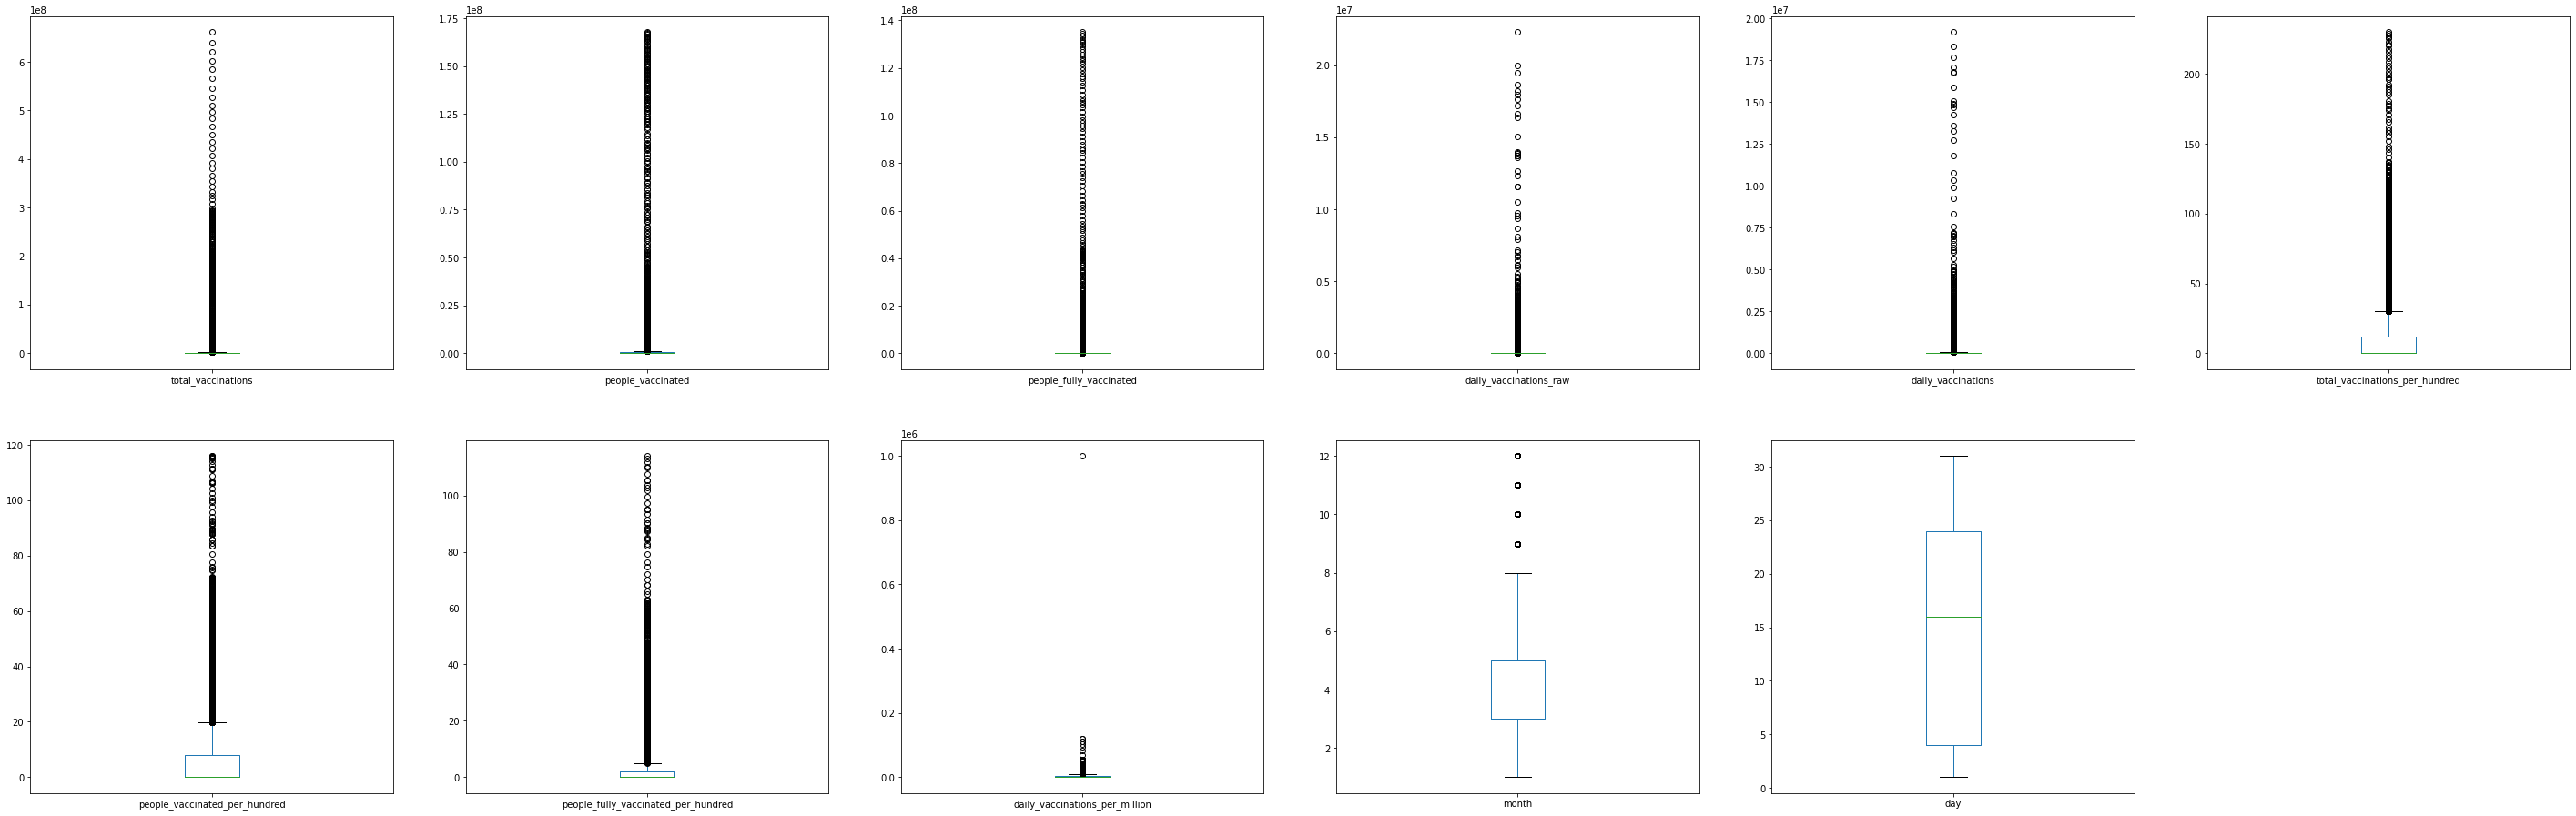

In [23]:
#Plotting the boxplot for identifying the outliers
covid_df.plot(kind='box',figsize=(50,50),layout=(6,6),sharex=False,subplots=True)

In [24]:
covid_df.describe()  #checking the description  of the dataframe

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,day
count,2.162800e+04,2.162800e+04,2.162800e+04,2.162800e+04,2.162800e+04,21628.00000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000
mean,4.042746e+06,2.132971e+06,9.094755e+05,8.042323e+04,8.791260e+04,11.55634,7.546136,3.253415,3189.724570,4.717496,14.942158
std,2.455146e+07,1.105273e+07,6.084645e+06,6.140054e+05,5.598415e+05,23.07979,14.573603,8.586379,8168.175566,2.924663,9.747552
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.657500e+02,0.00000,0.000000,0.000000,332.000000,3.000000,4.000000
50%,2.119250e+04,5.835000e+03,0.000000e+00,0.000000e+00,5.703500e+03,0.50000,0.120000,0.000000,1579.500000,4.000000,16.000000
75%,8.325940e+05,5.099810e+05,1.070750e+05,1.546275e+04,3.085875e+04,12.03000,7.875000,2.030000,4434.000000,5.000000,24.000000
max,6.614680e+08,1.677340e+08,1.350873e+08,2.229600e+07,1.917357e+07,230.09000,116.000000,114.090000,1000000.000000,12.000000,31.000000


# What vaccines are used and in which countries?

In [25]:
#Getting list of  diffrent vaccines used 
a=covid_df.loc[:,'vaccines']
i=0
list_vaccine=[]
for item in a:
    splitted_vaccine=a[i].split(",")
    for j in splitted_vaccine:
        list_vaccine.append(j.lstrip())
    i=i+1

vaccines_brand=set(list_vaccine)
print(vaccines_brand)

{'Oxford/AstraZeneca', 'QazVac', 'Sinopharm/HayatVax', 'Sputnik V', 'Pfizer/BioNTech', 'CanSino', 'Sinopharm/Wuhan', 'RBD-Dimer', 'Sinopharm/Beijing', 'Moderna', 'Abdala', 'Sinovac', 'EpiVacCorona', 'Johnson&Johnson', 'Covaxin', 'Soberana02'}


In [26]:
#creating a new dataframe with vaacine name and countries those are using these vaccines
vaccines_by_country=covid_df.groupby('vaccines')['country'].unique()
vaccines_brand_df=pd.DataFrame(vaccines_brand,columns=['brand'])
i=0
for item in vaccines_brand_df.brand:
    
    list_country=[]
    for vaccines,countr in vaccines_by_country.iteritems():
        if vaccines.find(str(item))!=-1:
            list_country.extend(countr)
            #print(list_country)
    if len(list_country):
        vaccines_brand_df.loc[i,'No_of_countries']=len(list_country)
        vaccines_brand_df.loc[i,'countries']=str(list_country)
    i=i+1
    

vaccines_brand_df

,brand,No_of_countries,countries
0,Oxford/AstraZeneca,173.0,"['Mexico', 'Pakistan', 'Central African Republ..."
1,QazVac,1.0,['Kazakhstan']
2,Sinopharm/HayatVax,1.0,['Kazakhstan']
3,Sputnik V,43.0,"['Mexico', 'Pakistan', 'Paraguay', 'Iran', 'Tu..."
4,Pfizer/BioNTech,103.0,"['Mexico', 'Austria', 'Belgium', 'Bulgaria', '..."
5,CanSino,3.0,"['Mexico', 'Pakistan', 'China']"
6,Sinopharm/Wuhan,2.0,"['China', 'United Arab Emirates']"
7,RBD-Dimer,1.0,['Uzbekistan']
8,Sinopharm/Beijing,53.0,"['Pakistan', 'China', 'Comoros', 'Mauritius', ..."
9,Moderna,49.0,"['Austria', 'Belgium', 'Bulgaria', 'Cyprus', '..."


Text(0.5, 0, 'No. of country')

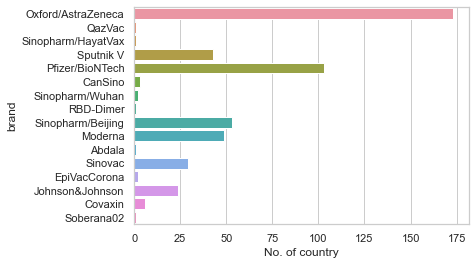

In [27]:
#plotting which vaccine is used in how many countries
sns.set_theme(style="whitegrid")
sns.barplot(y=vaccines_brand_df.brand, x=vaccines_brand_df.No_of_countries, orient='h')
plt.ylabel("brand")
plt.xlabel("No. of country")

objective 1:What vaccines are used and in which countries?
-As we can see in the plot graph oxford/Astrazeneca is usued in most of the countries
-Vaccines used
1.Oxford/AstraZeneca
2.QazVac
3.Sinopharm/HayatVax
4.Sputnik V
5.Pfizer/BioNTech
6.CanSino
7.Sinopharm/Wuhan
8.RBD-Dimer
9.Sinopharm/Beijing
10.Moderna
11.Abdala
12.Sinovac
13.EpiVacCorona
14.Johnson&Johnson
15.Covaxin
16.Soberana02
Sinopharm/Beijing and Sinopharm/Wuhan may be same vaccine

# Which vaccine is used in most of the countries?

Oxford/AstraZeneca is used in 173 countries which is maximum

# What country hasvaccinated a larger percent from its population?

In [29]:
vaccination_per_hundred=covid_df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(20)
print(vaccination_per_hundred)

country
Gibraltar               230.09
Seychelles              136.74
United Arab Emirates    130.13
Falkland Islands        126.53
San Marino              125.31
Israel                  122.27
Cayman Islands          121.91
Saint Helena            116.80
Malta                   116.79
Bermuda                 110.52
Aruba                   106.92
Isle of Man             105.51
Wales                   103.19
Jersey                  101.95
Bahrain                 101.83
Pitcairn                100.00
England                  97.11
Scotland                 96.93
Chile                    96.64
Mongolia                 96.54
Name: total_vaccinations_per_hundred, dtype: float64


In the above Dataset we can find counntry name Gibralter have some unexpected vaccination and they are outliers so we can remove that country from this dataframe

In [33]:
#removing outlier
covid_df.drop(covid_df.loc[covid_df['country']=='Gibraltar'].index, inplace=True)
#getting vaccinations_per_hundred after removing outliers
vaccination_per_hundred=covid_df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(20)

Text(0, 0.5, 'Country')

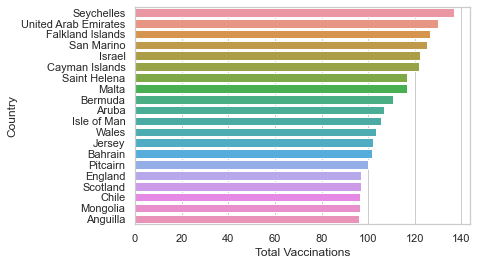

In [34]:
sns.set_theme(style="whitegrid")
sns.barplot(x=vaccination_per_hundred.values, y=vaccination_per_hundred.index, orient='h')
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")

We can see Seychelles UAE israel are the countries which vaccinated most of its population

In [35]:
#getting countries name having maximum vaccination in numbers
vaccination=covid_df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10)
print(vaccination)


country
China             661468000.0
United States     294928850.0
India             210449895.0
Brazil             67482730.0
United Kingdom     64916544.0
England            54657957.0
Germany            49940729.0
France             36218537.0
Italy              34951354.0
Mexico             30477703.0
Name: total_vaccinations, dtype: float64


Text(0, 0.5, 'Country')

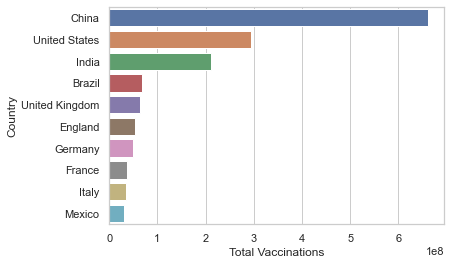

In [36]:
#plotting bar Graph 
sns.set_theme(style="whitegrid")
sns.barplot(x=vaccination.values, y=vaccination.index, orient='h')
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")

from the above Graph and data we can conclude that china gave maximum no. of dose of vaccination

country
Pitcairn                             47.0
Tuvalu                             2400.0
Montserrat                         2522.0
Cook Islands                       4363.0
Falkland Islands                   4407.0
Guinea-Bissau                      5889.0
Saint Helena                       7091.0
Bonaire Sint Eustatius and Saba    7391.0
Nauru                              7392.0
Wallis and Futuna                  8283.0
Name: total_vaccinations, dtype: float64


Text(0, 0.5, 'Country')

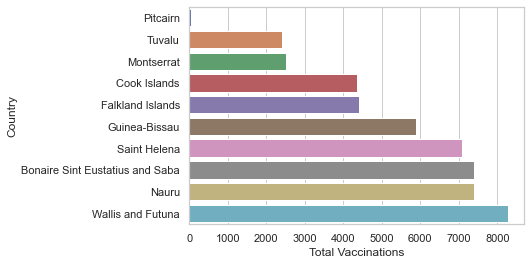

In [37]:
#getting countries name having minimum vaccination in numbers
vaccination=covid_df.groupby('country')['total_vaccinations'].max().sort_values(ascending=True).head(10)
print(vaccination)

#plotting bar Graph 
sns.set_theme(style="whitegrid")
sns.barplot(x=vaccination.values, y=vaccination.index, orient='h')
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")

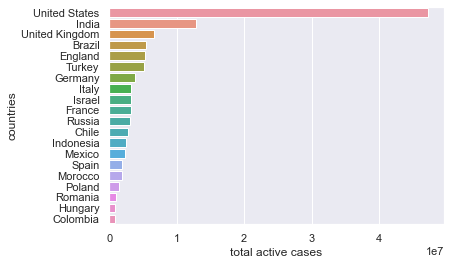

In [84]:
x=covid_df.groupby('country')['people_fully_vaccinated'].max().sort_values(ascending=False).head(20)
sns.set_style("darkgrid")
plt.Figure(figsize=(20,15))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("")
ax.set_ylabel("countries")


plt.show()

# Represent the progress of India in vaccination.

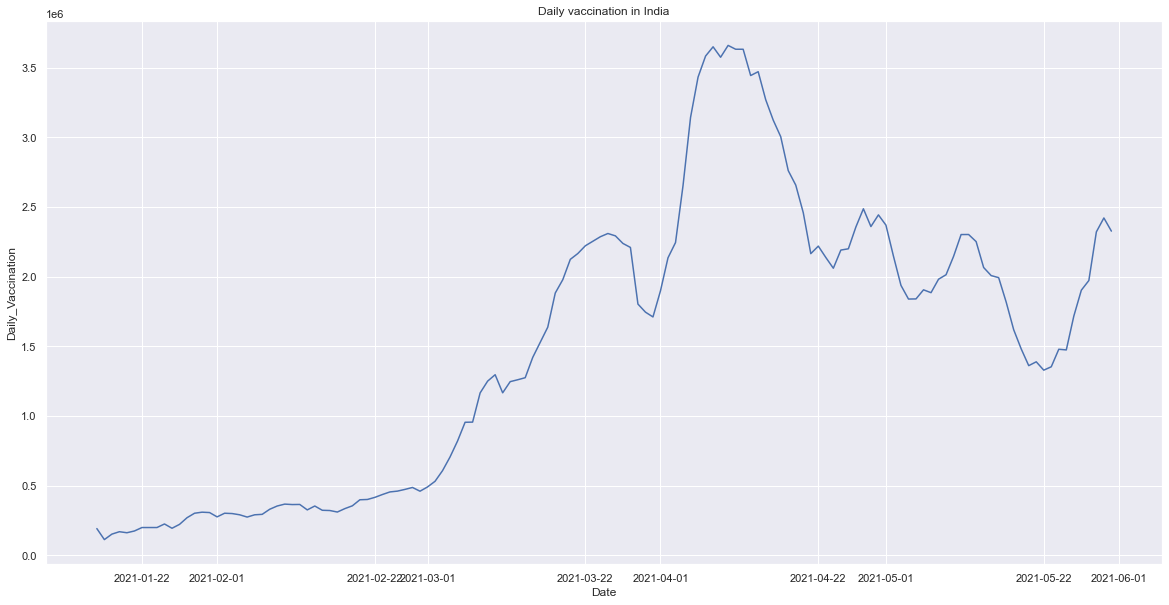

In [89]:
#Progress of india
#1.  Daily vaccination in India
india_df=covid_df[covid_df['country'] == 'India']
plt.figure(figsize=(20,10))
x=[datetime.datetime.strptime(d,"%d-%m-%Y").date() for d in india_df.date]
sns.lineplot(x,y=india_df.daily_vaccinations)
plt.xlabel("Date")
plt.ylabel("Daily_Vaccination")
plt.title('Daily vaccination in India');

In [41]:
india_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month,day
8764,India,IND,2021-01-15,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,1,15
8765,India,IND,2021-01-16,191181.0,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,139.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,1,16
8766,India,IND,2021-01-17,224301.0,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,81.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,1,17
8767,India,IND,2021-01-18,454049.0,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,110.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,1,18
8768,India,IND,2021-01-19,674835.0,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,122.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,India,IND,2021-05-27,201203166.0,158783606.0,42419560.0,2777551.0,1902326.0,14.58,11.51,3.07,1378.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,5,27
8897,India,IND,2021-05-28,203166802.0,160605562.0,42561240.0,1963636.0,1971730.0,14.72,11.64,3.08,1429.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,5,28
8898,India,IND,2021-05-29,207088953.0,164158704.0,42930249.0,3922151.0,2320922.0,15.01,11.90,3.11,1682.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,5,29
8899,India,IND,2021-05-30,208665123.0,165598013.0,43067110.0,1576170.0,2420840.0,15.12,12.00,3.12,1754.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/,5,30


In [42]:
india_df.date

8764   2021-01-15
8765   2021-01-16
8766   2021-01-17
8767   2021-01-18
8768   2021-01-19
          ...    
8896   2021-05-27
8897   2021-05-28
8898   2021-05-29
8899   2021-05-30
8900   2021-05-31
Name: date, Length: 137, dtype: datetime64[ns]

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

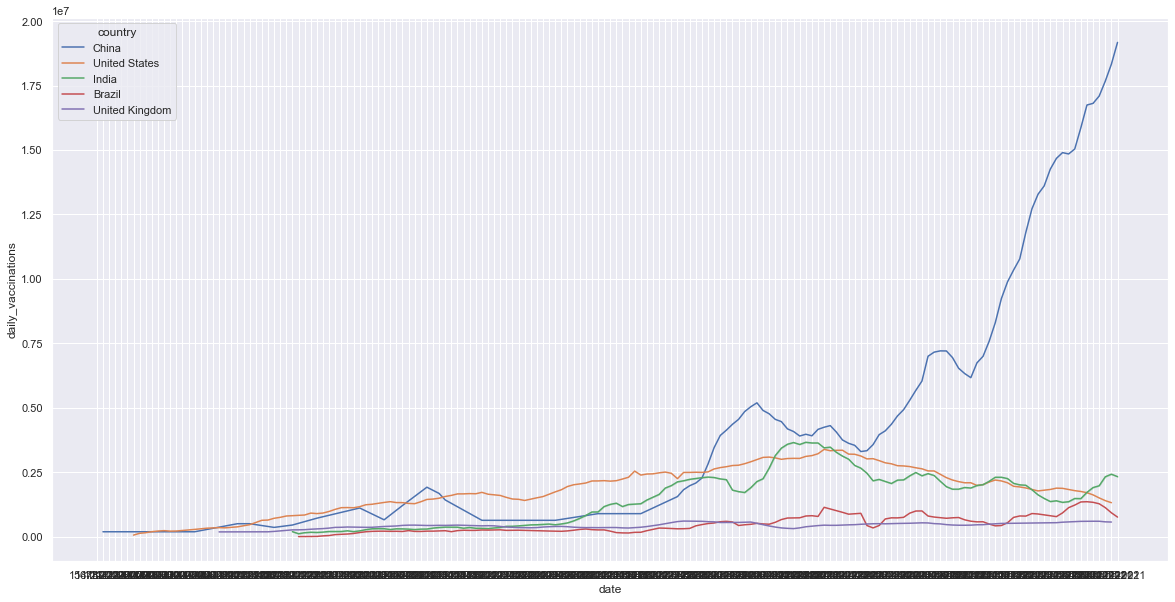

In [99]:
#vaccination of india with compare to other major countries who have vaccinated more no. of the people (top5)
#getting top 5 countrtes
countries = covid_df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index
#countries
top_countries = pd.DataFrame(columns= covid_df.columns)
for country in countries:
  top_countries = top_countries.append(covid_df.loc[covid_df['country'] == country])

top_countries=top_countries.append(covid_df.loc[covid_df['country']=='India'])
top_countries.groupby('country')['daily_vaccinations'].max()

#top_countries
plt.figure(figsize=(20,10))
#x=[datetime.datetime.strptime(d,"%d-%m-%Y").date() for d in date]
sns.lineplot(top_countries['date'],
             top_countries['daily_vaccinations'], 
             hue= top_countries['country'], ci= False)

In [105]:
Africa=['Nigeria', 'Ethiopia', 'Egypt', 'Democratic Republic of the Congo', 'Tanzania', 'South Africa', 'Kenya', 'Uganda', 'Algeria', 'Sudan', 'Morocco', 'Angola', 'Mozambique', 'Ghana', 'Madagascar', 'Cameroon', "Côte d'Ivoire", 'Niger', 'Burkina Faso', 'Mali', 'Malawi', 'Zambia', 'Senegal', 'Chad', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Tunisia', 'South Sudan', 'Togo', 'Sierra Leone', 'Libya', 'Congo', 'Liberia', 'Central African Republic', 'Mauritania', 'Eritrea', 'Namibia', 'Gambia', 'Botswana', 'Gabon', 'Lesotho', 'Guinea-Bissau', 'Equatorial Guinea', 'Mauritius', 'Eswatini', 'Djibouti', 'Réunion', 'Comoros', 'Western Sahara', 'Cabo Verde', 'Mayotte', 'Sao Tome and Principe', 'Seychelles', 'Saint Helena']
Asia=['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam', 'Turkey', 'Iran', 'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan', 'Saudi Arabia', 'Uzbekistan', 'Malaysia', 'Yemen', 'Nepal', 'North Korea', 'Taiwan', 'Sri Lanka', 'Kazakhstan', 'Syria', 'Cambodia', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Tajikistan', 'Israel', 'Hong Kong', 'Laos', 'Lebanon', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'Oman', 'State of Palestine', 'Kuwait', 'Georgia', 'Mongolia', 'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus', 'Bhutan', 'Macao', 'Maldives', 'Brunei Darussalam']
Antarica=[]
South_America=['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'French Guiana', 'Falkland Islands']
North_America=['U.S.A.', 'Mexico', 'Canada', 'Guatemala', 'Haiti', 'Cuba', 'Dominican Republic', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Jamaica', 'Puerto Rico', 'Trinidad and Tobago', 'Guadeloupe', 'Belize', 'Bahamas', 'Martinique', 'Barbados', 'Saint Lucia', 'Curaçao', 'Grenada', 'Saint Vincent and the Grenadines', 'Aruba', 'United States Virgin Islands', 'Antigua and Barbuda', 'Dominica', 'Cayman Islands', 'Bermuda', 'Greenland', 'Saint Kitts and Nevis', 'Sint Maarten', 'Turks and Caicos Islands', 'Saint Martin', 'British Virgin Islands', 'Caribbean Netherlands', 'Anguilla', 'Saint Barthélemy', 'Saint Pierre and Miquelon', 'Montserrat']
Australia=['Australia', 'Papua New Guinea', 'New Zealand', 'Fiji', 'Solomon Islands', 'Micronesia', 'Vanuatu', 'New Caledonia', 'French Polynesia', 'Samoa', 'Guam', 'Kiribati', 'Tonga', 'Marshall Islands', 'Northern Mariana Islands', 'American Samoa', 'Palau', 'Cook Islands', 'Tuvalu', 'Wallis and Futuna Islands', 'Nauru', 'Niue', 'Tokelau']
Europe=['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'North Macedonia', 'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Channel Islands', 'Isle of Man', 'Andorra', 'Faeroe Islands', 'Monaco', 'Liechtenstein', 'San Marino', 'Gibraltar', 'Holy See']


continents=['Africa','Asia','Antarica','South_America','North_America','Australia','Europe']

unique_countries=covid_df['country'].unique()
#for country_in_Africa in Africa:
#    print(country_in_Africa)

    
data=[]    
for item in Africa:
    data.append([item,'Africa'])
for item in Asia:
    data.append([item,'Asia'])
for item in South_America:
    data.append([item,'South_America'])
for item in North_America:
    data.append([item,'North_America'])
for item in Australia:
    data.append([item,'Australia'])
for item in Europe:
    data.append([item,'Europe'])
#print(data)
    
country_df=pd.DataFrame(data,columns=['country','continent'])
country_df
result = covid_df.merge(country_df, on='country')
#result
vaccination_by_continent=result.groupby(['continent','date'])['daily_vaccinations'].sum()
#vaccination_by_continent.keys('data')
#frame = { 'date': date, 'continent': continent 'daily_vaccination_by_continent': }

vaccination_by_continent_df=vaccination_by_continent.to_frame()
#for item in vaccination_by_continent_df.index:
#    print(item)


i=0
continent=[]
date=[]
daily_vaccinations=[]
for index,values in vaccination_by_continent.items():
    continent.append(index[0])
    daily_vaccinations.append(str(values))
    date.append(index[1])

    
                              

vaccination_by_continent_df=pd.DataFrame(columns=['Continent', 'Date', 'Daily_vaccinations'])

vaccination_by_continent_df['Continent']=continent
vaccination_by_continent_df['Date']=date
vaccination_by_continent_df['Daily_vaccinations']=daily_vaccinations

V_C=vaccination_by_continent_df.groupby('Continent')



In [106]:
for values in V_C:
    print(values)
    


('Africa',     Continent        Date Daily_vaccinations
0      Africa  01-02-2021            55718.0
1      Africa  01-03-2021           202324.0
2      Africa  01-04-2021           293030.0
3      Africa  01-05-2021           237281.0
4      Africa  02-02-2021            57648.0
..        ...         ...                ...
138    Africa  30-04-2021           235638.0
139    Africa  30-05-2021           411969.0
140    Africa  31-01-2021            46602.0
141    Africa  31-03-2021           300487.0
142    Africa  31-05-2021           392590.0

[143 rows x 3 columns])
('Asia',     Continent        Date Daily_vaccinations
143      Asia  01-01-2021           352846.0
144      Asia  01-02-2021          1683418.0
145      Asia  01-03-2021          2104890.0
146      Asia  01-04-2021          8338590.0
147      Asia  01-05-2021         11627539.0
..        ...         ...                ...
306      Asia  30-12-2020           293138.0
307      Asia  31-01-2021          1514207.0
308      A

# Feature Engineering and selection


In [55]:
covid_df_model=covid_df
#we have a date time column which is in object type which needs to be change in date time format
covid_df_model['date'] = pd.to_datetime(covid_df['date'])
#as we have only data of 2021 so we will not use year column in dataframe
#Extracting month and day 
covid_df_model['month']=covid_df['date'].dt.month
covid_df_model['day']=covid_df['date'].dt.day

1.Normalization and label encoding


In [56]:
label_encoder = preprocessing.LabelEncoder()
covid_df_model['country']= label_encoder.fit_transform(covid_df['country'])
covid_df_model['vaccines']= label_encoder.fit_transform(covid_df['vaccines'])
covid_df_model['source_name']= label_encoder.fit_transform(covid_df['source_name'])
covid_df_model['source_website']= label_encoder.fit_transform(covid_df['source_website'])
covid_df_model['iso_code']= label_encoder.fit_transform(covid_df['iso_code'])

covid_df_model.drop(columns='date', axis=0, inplace=True) #already filtered out day and month from the date

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
#scaling.fit_transform(covid_df_model['daily_vaccinations','daily_vaccinations_per_million'])
covid_df_model_normalized=scaling.fit_transform(covid_df_model[['country','vaccines','iso_code','source_name','source_website','total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','month','day']])

<AxesSubplot:>

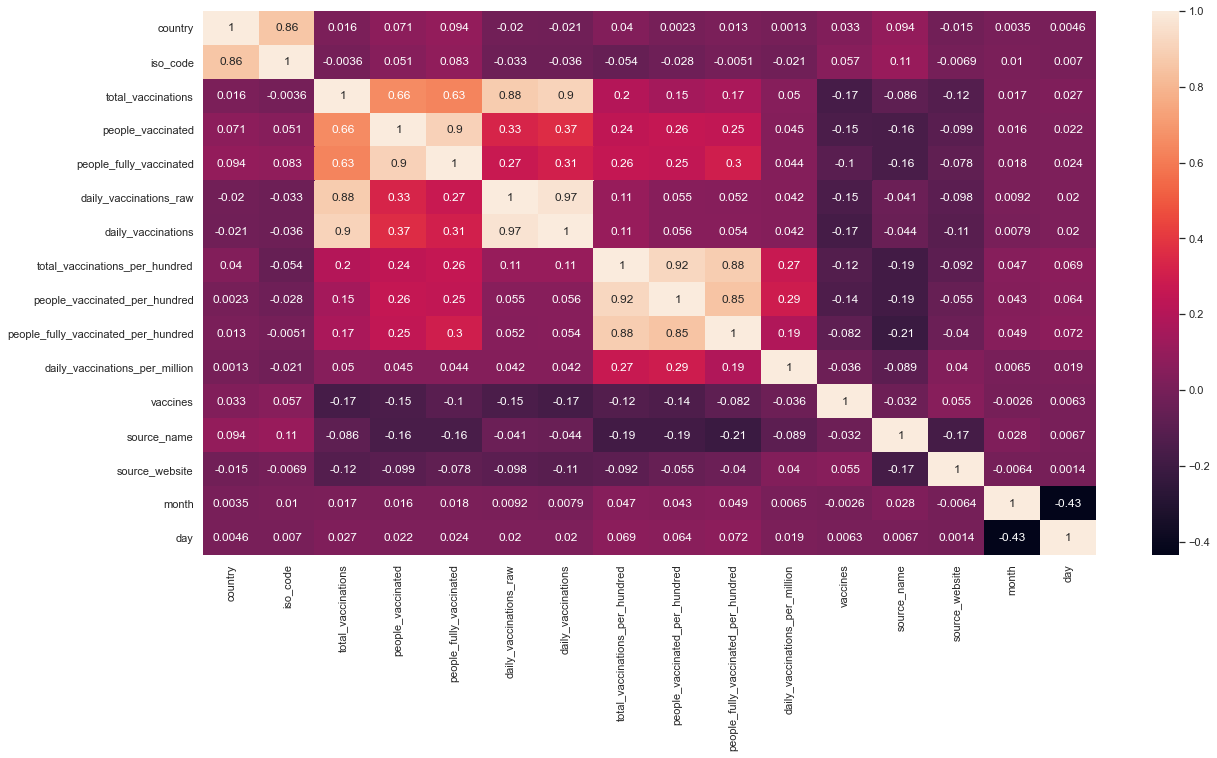

In [59]:
#Heatmap with correlation value
corr = covid_df_model.corr() #getting onlu numerical values
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True)

In [60]:
#splitting the data frame in test train
y=covid_df_model['daily_vaccinations_per_million'] #target
x=covid_df_model.drop(['daily_vaccinations_per_million'],axis=1)  #features
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [62]:
#feature selection using k best method


top_features_obj=SelectKBest(score_func=chi2,k=5)
top_features=top_features_obj.fit(x,y)

In [63]:
top_features=pd.DataFrame(top_features.scores_,columns=['Score'])
top_features_columns=pd.DataFrame(x.columns,columns=['name'])
top_features=pd.concat([top_features,top_features_columns],axis=1)

In [64]:
top_features

,Score,name
0,3.654370e+05,country
1,3.559736e+05,iso_code
2,2.345588e+12,total_vaccinations
3,7.686540e+11,people_vaccinated
4,6.077795e+11,people_fully_vaccinated
5,7.885938e+10,daily_vaccinations_raw
6,5.949306e+10,daily_vaccinations
7,6.896469e+05,total_vaccinations_per_hundred
8,4.313997e+05,people_vaccinated_per_hundred
9,2.927141e+05,people_fully_vaccinated_per_hundred


Text(0, 0.5, 'Country')

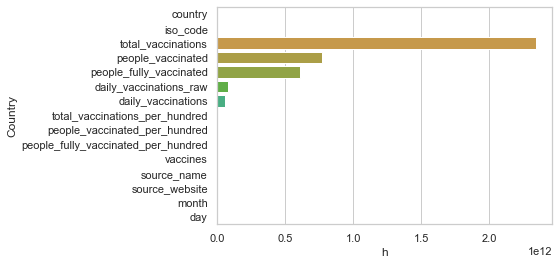

In [65]:
sns.set_theme(style="whitegrid")
sns.barplot(x=top_features.Score, y=top_features.name, orient='h')
plt.xlabel('h')
plt.ylabel("Country")

In [66]:
#Model creation Linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [68]:
coeff=pd.DataFrame(LR.coef_,X_train.columns)
coeff

,0
country,-3.222411
iso_code,3.728757
total_vaccinations,-0.000045
people_vaccinated,-0.000070
people_fully_vaccinated,0.000166
daily_vaccinations_raw,0.000018
daily_vaccinations,0.002029
total_vaccinations_per_hundred,100.087163
people_vaccinated_per_hundred,231.597299
people_fully_vaccinated_per_hundred,-411.384940


In [69]:
predection=LR.predict(X_test)

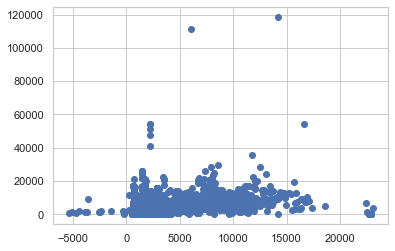

In [70]:
plt.scatter(predection,Y_test)

By the Above Graph we can analyse that our predection and test values are not in best line we want but still we have a better performing result
as the data columns contains highly NULL values which have high feature dependecies on the Output